## <strong> 13. 시계열 전용 연산

필요한 라이브러리: ```yfinance```, ```pandas_datareader```

In [5]:
!pip install --upgrade yfinance 

   ---------------------------------------- 0.0/117.9 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/117.9 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 112.6/117.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 117.9/117.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.4 MB 3.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 4.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.4 MB 4.4 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 4.6 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.4 MB 3.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.0 MB/s eta 0:00:00
   ----------

In [15]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
# 구글 주식 데이터 로딩
goog = yf.download("GOOGL", start="2004-01-01", end="2024-12-31")
goog.head()

Failed to get ticker 'GOOGL' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOGL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,


In [12]:
# [+] 종가(Close) 데이터만 사용하기
goog = goog['Close']
goog

Ticker,GOOG
Date,


<Axes: xlabel='Date'>

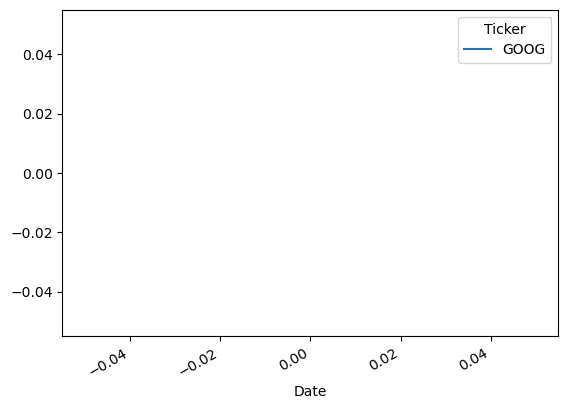

In [13]:
# [+] Lineplot 시각화
goog.plot()

#### <strong> 리샘플링(Resampling)
+ ```resample()```: 빈도를 기준으로 집계 연산
+ ```asfreq()```: 빈도 단위 별 데이터 선택

In [27]:
# [+] 다운샘플링: resample()
goog_downsampled = goog.resample('ME').mean()
goog_downsampled

ValueError: Invalid frequency: ME

In [ ]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))
goog.plot(label='original', ax=ax[0])
ax[0].legend()
goog_downsampled.plot(label='downsampled', ax=ax[1])
ax[1].legend()
plt.tight_layout()

In [ ]:
# [+] 다운샘플링: asfreq()
goog_downsampled = goog.asfreq('ME')
print(goog_downsampled)

goog_downsampled.plot()

In [ ]:
# [+] 업샘플링: resample()
goog_upsampled = ('12h').mean()
print(goog_upsampled)

#### <strong> 시프팅(Shifting)
+ ```shift(periods)``` : ```periods``` 값 만큼 시계열 이동

In [ ]:
# [+] 900일 뒤로 시프팅 적용
goog_shifted = goog.shift(periods=900)
goog_shifted

In [ ]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

goog.plot(label='original', ax=ax[0])
ax[0].legend()
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

goog_shifted.plot(label='shifted 900 days', ax=ax[1])
ax[1].legend()
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()

In [ ]:
# shifting 응용: 주가 변화율 계산
goog_shifted = goog.shift(periods=1) # [+] 시프팅
(goog - goog_shifted) / goog_shifted # [+] 주가 변화율 계산

In [ ]:
# shifting 응용: 차분 시계열 구하기
goog_diff = goog - goog_shifted  # [+] 차분
print(goog_diff)

goog_diff.plot()

#### <strong> 윈도잉(Windowing)

In [ ]:
# [+] 365일 단위 윈도잉
goog_rolled = goog.rolling(365)
print(goog_rolled)

goog_rolled.mean().plot()

In [ ]:
data = pd.DataFrame({'input': goog.values.flatten(),
                     # moving average
                     'one-year rolling_mean': goog_rolled.mean().values.flatten(), 
                     # standard deviation
                     'one-year rolling_std': goog_rolled.std().values.flatten()}, index=goog.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)